In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os
import seaborn as sns
from scipy.stats import boxcox
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\123sa\Downloads\loan_train.csv")

In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,573354,737474,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,476321,603324,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,451484,556265,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1018129,1246557,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,...,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN
4,800018,1005270,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleaning

In [4]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
False    24999
Name: id, dtype: int64

member_id
False    24999
Name: member_id, dtype: int64

loan_amnt
False    24999
Name: loan_amnt, dtype: int64

funded_amnt
False    24999
Name: funded_amnt, dtype: int64

funded_amnt_inv
False    24999
Name: funded_amnt_inv, dtype: int64

term
False    24999
Name: term, dtype: int64

int_rate
False    24999
Name: int_rate, dtype: int64

installment
False    24999
Name: installment, dtype: int64

grade
False    24999
Name: grade, dtype: int64

sub_grade
False    24999
Name: sub_grade, dtype: int64

emp_title
False    24993
True         6
Name: emp_title, dtype: int64

emp_length
False    24958
True        41
Name: emp_length, dtype: int64

home_ownership
False    24999
Name: home_ownership, dtype: int64

annual_inc
False    24999
Name: annual_inc, dtype: int64

verification_status
False    24999
Name: verification_status, dtype: int64

issue_d
False    24999
Name: issue_d, dtype: int64

loan_status
False    24999
Name: loan_status, dtype: int64

In [5]:
columns =  ["tax_liens","chargeoff_within_12_mths","collections_12_mths_ex_med"]
df[columns].nunique()

tax_liens                     1
chargeoff_within_12_mths      1
collections_12_mths_ex_med    1
dtype: int64

In [6]:
#dropping the columns as it has only one unique value which is 0 and it wouldn't be useful
columns =  ["tax_liens","chargeoff_within_12_mths","collections_12_mths_ex_med"]
df = df.drop(columns, axis =1)

In [7]:
#columns which are not useful in the analysis
cols= ['url', 'desc', 'policy_code','earliest_cr_line', 'emp_title','id','next_pymnt_d', 'title', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code','issue_d']
df = df.drop(cols, axis=1)

In [8]:
for i in missing_data.columns.values.tolist():
    if missing_data[i].sum() == 24999:
        df = df.drop(i, axis = 1)
        df.reset_index(drop =True, inplace = True)

In [9]:
df.shape

(24999, 41)

In [10]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,737474,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,10+ years,...,2235.98,386.43,3.96,11-Mar,311.11,11-Jul,INDIVIDUAL,0,0,0.0
1,603324,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,1 year,...,14911.26,0.00,0.00,10-Mar,15114.03,10-Feb,INDIVIDUAL,0,0,0.0
2,556265,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,4 years,...,2354.97,0.00,0.00,11-Dec,101.78,11-Dec,INDIVIDUAL,0,0,0.0
3,1246557,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,10+ years,...,48442.03,0.00,0.00,16-May,944.71,16-May,INDIVIDUAL,0,0,2.0
4,1005270,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,5 years,...,20804.23,0.00,0.00,15-Sep,3943.27,16-May,INDIVIDUAL,0,0,0.0


In [11]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [12]:
df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,737474,10000,10000,9950.00000,36 months,7.51,311.11,A,A4,10+ years,...,2235.98,386.43,3.96,11-Mar,311.11,11-Jul,INDIVIDUAL,0,0,0.0
1,603324,15000,15000,14800.00000,36 months,8.94,476.58,A,A5,1 year,...,14911.26,0.00,0.00,10-Mar,15114.03,10-Feb,INDIVIDUAL,0,0,0.0
2,556265,2000,2000,2000.00000,36 months,13.57,67.94,C,C3,4 years,...,2354.97,0.00,0.00,11-Dec,101.78,11-Dec,INDIVIDUAL,0,0,0.0
3,1246557,35000,35000,33951.84413,60 months,20.89,944.71,F,F1,10+ years,...,48442.03,0.00,0.00,16-May,944.71,16-May,INDIVIDUAL,0,0,2.0
4,1005270,14000,14000,14000.00000,60 months,17.49,351.64,D,D5,5 years,...,20804.23,0.00,0.00,15-Sep,3943.27,16-May,INDIVIDUAL,0,0,0.0


In [13]:
## selecting the columns that are necessary for our analysis.
df_select = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','pub_rec_bankruptcies','loan_status'])
df_select.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
purpose                  object
dti                     float64
delinq_2yrs               int64
pub_rec_bankruptcies    float64
loan_status              object
dtype: object

In [14]:
df_select.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,10000,36 months,7.51,311.11,A,A4,10+ years,RENT,30000.0,Source Verified,home_improvement,5.00,0,0.0,Charged Off
1,15000,36 months,8.94,476.58,A,A5,1 year,RENT,147000.0,Not Verified,other,3.47,0,0.0,Fully Paid
2,2000,36 months,13.57,67.94,C,C3,4 years,OWN,36000.0,Not Verified,major_purchase,7.83,0,0.0,Fully Paid
3,35000,60 months,20.89,944.71,F,F1,10+ years,MORTGAGE,160000.0,Verified,debt_consolidation,12.11,0,2.0,Current
4,14000,60 months,17.49,351.64,D,D5,5 years,MORTGAGE,50000.0,Not Verified,debt_consolidation,21.24,1,0.0,Fully Paid


<AxesSubplot:>

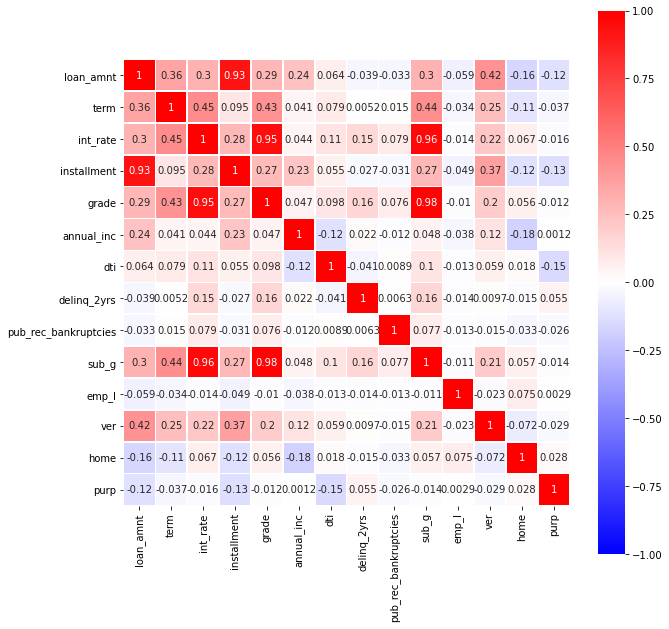

In [15]:
plt.figure(figsize=(10,10))
##finding the correlation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_select.assign(grade=df_select.grade.astype('category').cat.codes,
                         sub_g=df_select.sub_grade.astype('category').cat.codes,
                         term=df_select.term.astype('category').cat.codes,
                        emp_l=df_select.emp_length.astype('category').cat.codes,
                         ver =df_select.verification_status.astype('category').cat.codes,
                        home=df_select.home_ownership.astype('category').cat.codes,
                        purp=df_select.purpose.astype('category').cat.codes).corr(),
                        annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)


In [16]:
df_select.drop(['grade', 'sub_grade'], axis=1, inplace = True)

In [17]:
df_select.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,10000,36 months,7.51,311.11,10+ years,RENT,30000.0,Source Verified,home_improvement,5.00,0,0.0,Charged Off
1,15000,36 months,8.94,476.58,1 year,RENT,147000.0,Not Verified,other,3.47,0,0.0,Fully Paid
2,2000,36 months,13.57,67.94,4 years,OWN,36000.0,Not Verified,major_purchase,7.83,0,0.0,Fully Paid
3,35000,60 months,20.89,944.71,10+ years,MORTGAGE,160000.0,Verified,debt_consolidation,12.11,0,2.0,Current
4,14000,60 months,17.49,351.64,5 years,MORTGAGE,50000.0,Not Verified,debt_consolidation,21.24,1,0.0,Fully Paid


In [18]:
##printing the count and null values in the dataframe
dfselect_null = pd.DataFrame({'Count': df_select.isnull().sum(), 'Percent': 100*df_select.isnull().sum()/len(df_select)})
dfselect_null[dfselect_null['Count'] > 0]

,Count,Percent
emp_length,41,0.164007
pub_rec_bankruptcies,417,1.668067


In [19]:
#I'll be filling the null values with 0 assuming that the borrower hasn't worked many years  for his data to be recorded.
df_select['emp_length'].fillna(value=0,inplace=True)


In [20]:
df_select["pub_rec_bankruptcies"].replace(np.nan, 0.0, inplace=True)

In [21]:
df_select['emp_length'].isnull().value_counts()


False    24999
Name: emp_length, dtype: int64

In [22]:
df_select['pub_rec_bankruptcies'].isnull().value_counts()

False    24999
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
## printing unique statuses in the loan status column (dependent variable)
df_select['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

## Distribution of loan status values

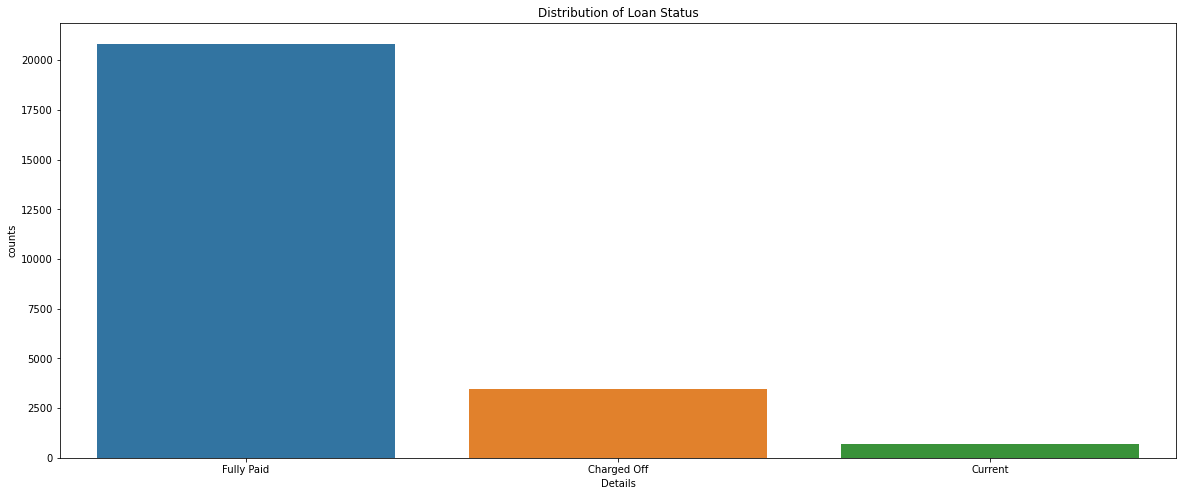

In [24]:
s =df_select['loan_status'].value_counts().to_frame()
s.reset_index(inplace=True)
s.columns = ["Loan status","counts"]
plt.subplots(figsize=(20,8))
sns.barplot(y='counts', x='Loan status', data=s)
plt.xlabel("Details")
plt.ylabel("counts")
plt.title("Distribution of Loan Status")
plt.show()


## Categorical to binary variables

In [25]:
# I'll be giving values 1 to default and rest all as 0
df_select['loan_status'] = df_select['loan_status'].replace({'Charged Off':'Default'})
df_select['loan_status'].value_counts()

Fully Paid    20827
Default        3474
Current         698
Name: loan_status, dtype: int64

In [26]:
target_list = [1 if i=='Default' else 0 for i in df_select['loan_status']]
df_select['status_loan'] = target_list
df_select['status_loan'].value_counts()

0    21525
1     3474
Name: status_loan, dtype: int64

In [27]:
df_select.drop('loan_status',axis=1,inplace=True)

In [28]:
df_select.delinq_2yrs=df_select.delinq_2yrs.astype('category').cat.codes
df_select['term'] = df_select['term'].map(lambda x: x.lstrip(' ').rstrip('months'))
#df_select['emp_length'] = df_select['emp_length'].str.replace(r'\D', '')


In [29]:
df_select.term = df_select.term.astype("int64") 
#df_select.emp_length = df_select.emp_length.astype("float64")

In [30]:
df_select.dtypes

loan_amnt                 int64
term                      int64
int_rate                float64
installment             float64
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
purpose                  object
dti                     float64
delinq_2yrs                int8
pub_rec_bankruptcies    float64
status_loan               int64
dtype: object

## Tranformation

In [31]:
float_columns = df_select.columns[df_select.dtypes == 'float64']
for i in float_columns:
    if df_select[i].min() > 0:
        transformed, lamb = boxcox(df_select.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_select.loc[df[i].notnull(), i] = transformed

In [32]:
df_select = pd.get_dummies(df_select, drop_first=True)

In [33]:
df_select.shape

(24999, 38)

In [34]:
df_select.dtypes

loan_amnt                                int64
term                                     int64
int_rate                               float64
installment                            float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                               int8
pub_rec_bankruptcies                   float64
status_loan                              int64
emp_length_1 year                        uint8
emp_length_10+ years                     uint8
emp_length_2 years                       uint8
emp_length_3 years                       uint8
emp_length_4 years                       uint8
emp_length_5 years                       uint8
emp_length_6 years                       uint8
emp_length_7 years                       uint8
emp_length_8 years                       uint8
emp_length_9 years                       uint8
emp_length_< 1 year                      uint8
home_ownership_OTHER                     uint8
home_ownershi

In [35]:
df_select.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,pub_rec_bankruptcies,status_loan,emp_length_1 year,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000,36,3.473199,13.557428,7.107751,5.00,0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,15000,36,3.970318,15.638995,7.782309,3.47,0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2000,36,5.351585,7.791215,7.189408,7.83,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,35000,60,7.115788,19.513919,7.816005,12.11,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14000,60,6.343182,14.131140,7.333666,21.24,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5b Classifier

In [36]:
X = df_select.loc[:, df_select.columns !='status_loan']
y = df_select.loc[:,'status_loan']

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
from sklearn.model_selection import cross_val_score


In [40]:
a = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
scores = []
for i in a:
    b= cross_val_score(GradientBoostingClassifier(learning_rate = i), X, y, cv=5)
    scores.append(np.average(b))

In [41]:
scores

[0.8607544548909782,
 0.8604344468893779,
 0.8592343988797759,
 0.8561543108621725,
 0.8537941828365673,
 0.8509540868173635,
 0.8480739587917583,
 0.8451137347469494,
 0.8437136067213442,
 0.8434736947389478,
 0.8394737187437487]

In [42]:
m = max(scores)
m

0.8607544548909782

In [43]:
scores.index(m)

0

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [45]:
model = GradientBoostingClassifier(learning_rate= 0.05, random_state = 42)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.8568

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model = GradientBoostingClassifier()
grid = dict()
grid['n_estimators'] = [10,50,100]
grid['subsample'] = [0.5,0.7,1]
grid['max_depth'] = [1,3,5]
grid_search = GridSearchCV(estimator= model, param_grid= grid, scoring= 'accuracy')
grid_result = grid_search.fit(X_train,y_train)
print("Best results: %f using %s" % (grid_result.best_score_, grid_search.best_params_))

Best results: 0.862964 using {'max_depth': 5, 'n_estimators': 10, 'subsample': 0.5}


# Effect of increasing no. of trees

In [55]:
df1 = pd.DataFrame(columns=['Number of boosting stages','Accuracy'])

for i in range(10,200,10):
    model = GradientBoostingClassifier(n_estimators= i, learning_rate=0.05, subsample = 0.5, max_depth= 5 )
    model.fit(X_train, y_train)
    accuracy = model.score(X_test,y_test)
    df1 = df1.append({'Number of boosting stages':i, 'Accuracy': accuracy }, ignore_index=True)
    

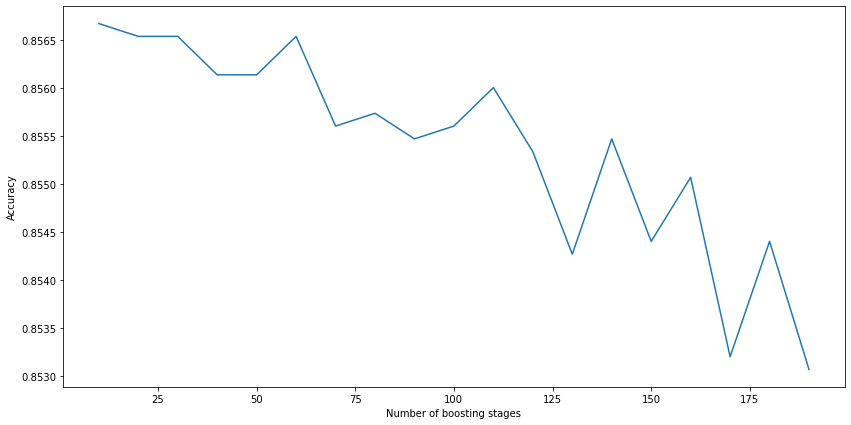

In [57]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df1, x='Number of boosting stages', y='Accuracy', ax=ax);

In [59]:
model = GradientBoostingClassifier(learning_rate= 0.05, random_state = 42, subsample = 0.5, max_depth= 5,n_estimators=10)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6425
           1       0.00      0.00      0.00      1075

    accuracy                           0.86      7500
   macro avg       0.43      0.50      0.46      7500
weighted avg       0.73      0.86      0.79      7500



D:\Anaconda path\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda path\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda path\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree
    

In [65]:
from sklearn.tree import DecisionTreeClassifier


In [67]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state=42)

In [69]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [70]:
clf.score(X_test,y_test)

0.764

In [71]:
y_pred = clf.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6425
           1       0.19      0.20      0.20      1075

    accuracy                           0.76      7500
   macro avg       0.53      0.53      0.53      7500
weighted avg       0.77      0.76      0.77      7500

